In [1]:
#loading the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset and checking top 5
data = pd.read_csv("netflix.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"""Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,"""December 23, 2016""",2016,93,"""After a devastating earthquake hits Mexico Ci...",Dramas
1,s3,Movie,23:59,Gilbert Chan,"""Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,"""December 20, 2018""",2011,78,"""When an army recruit is found dead, his fello...",Horror Movies
2,s4,Movie,9,Shane Acker,"""Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"""November 16, 2017""",2009,80,"""In a postapocalyptic world, rag-doll robots h...",Action
3,s5,Movie,21,Robert Luketic,"""Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"""January 1, 2020""",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"""Erdal Beşikçioğlu, Yasemin Allen, Melis Birka...",Turkey,"""July 1, 2017""",2016,1,"""A genetics professor experiments with a treat...",International TV


## Exploratory Data Overview

In [4]:
#quick overview of column names, data types and non null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [5]:
#to check number of rows and columns
data.shape

(4812, 11)

In [6]:
#to view all column names
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [7]:
#generate summary statistics of all columns
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,4812,4812,s2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,4812,2,Movie,4677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,4812,4812,7:19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,4812,3615,"""Raúl Campos, Jan Suter""",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,4812,4690,Samuel West,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,4812,72,United States,1886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,4812,1292,"""January 1, 2020""",100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,4812.0,NaN,NaN,NaN,2012.711554,9.517978,1942.0,2011.0,2016.0,2018.0,2021.0
duration,4812.0,NaN,NaN,NaN,99.566708,30.889305,1.0,88.0,99.0,116.0,253.0
description,4812,4807,"""A scheming matriarch plots to cut off her dis...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#to return the number of distinct/unique values(non-duplicate) in each column
data.nunique()

show_id         4812
type               2
title           4812
director        3615
cast            4690
country           72
date_added      1292
release_year      71
duration         193
description     4807
genre             31
dtype: int64

In [9]:
#Are there any duplicate rows?
data.duplicated().any()

False

In [10]:
#to check for duplicate records
data.duplicated().sum()

0

In [11]:
#to check for missing/incomplete records
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [12]:
#to check unique values in genre column
data["genre"].unique()

array(['Dramas', 'Horror Movies', 'Action', 'International TV',
       'Documentaries', 'Independent Movies', 'Comedies', 'Sci-Fi',
       'International Movies', 'Children', 'TV Shows', 'Uncategorized',
       'Classic Movies', 'Thrillers', 'Stand-Up', 'Anime Features',
       'Music', 'Anime Series', 'Kids', 'Docuseries', 'Crime TV',
       'British TV', 'Cult Movies', 'TV Action', 'Romantic TV',
       'TV Horror', 'Romantic Movies', 'TV Comedies', 'Classic',
       'Reality TV', 'LGBTQ Movies'], dtype=object)

In [13]:
#to preserve the original dataset
Netflix = data.copy()

## DATA CLEANING

In [15]:
#checking the date_added column
Netflix['date_added'].unique

<bound method Series.unique of 0       "December 23, 2016"
1       "December 20, 2018"
2       "November 16, 2017"
3         "January 1, 2020"
4            "July 1, 2017"
               ...         
4807     "November 1, 2019"
4808         "July 1, 2018"
4809     "January 11, 2020"
4810     "October 19, 2020"
4811        "March 2, 2019"
Name: date_added, Length: 4812, dtype: object>

In [16]:
#removing the double quotes and white spaces from entries and checking top 5 
columns = ['cast', 'date_added', 'description']
for column in columns:
    Netflix[column] = Netflix[column].str.replace('"', '').str.strip()
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [17]:
#converting from object type to datetime
Netflix['date_added'] = pd.to_datetime(Netflix['date_added'])
Netflix['date_added'].unique

<bound method Series.unique of 0      2016-12-23
1      2018-12-20
2      2017-11-16
3      2020-01-01
4      2017-07-01
          ...    
4807   2019-11-01
4808   2018-07-01
4809   2020-01-11
4810   2020-10-19
4811   2019-03-02
Name: date_added, Length: 4812, dtype: datetime64[ns]>

In [18]:
#checking columns again
Netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [19]:
#checking top 5 again
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,1,A genetics professor experiments with a treatm...,International TV


## EXPLORATORY INSIGHTS

__*Q1: What was the most frequent movie duration in the 1990s?*__

In [22]:
#columns needed: type, duration and release_year
#creating a subset of our dataset for records in 1990s i.e # Filtering movies and tv shows released between 1900 and 1999
#  or using _1900s = Netflix[(Netflix['release_year'] >= 1990) & (Netflix['release_year'] < 2000)]
_1990s = Netflix[Netflix['release_year'].between(1990, 1999)]

#filtering obly movies released in 1900s
movies_1990s = _1990s[_1990s['type']== "Movie"]

# Find the most frequent movie duration
most_frequent_duration= movies_1990s['duration'].value_counts().nlargest(1)


print(f"The most frequent movie duration in the 1990s was {most_frequent_duration.idxmax()} minutes with a value count of {max(most_frequent_duration)}")

The most frequent movie duration in the 1990s was 94 minutes with a value count of 7


__*Q2: A movie is considered short if it is less than 90 minutes. Count the number of short action 
movies released in the 1990s*__

In [24]:
#columns needed: type, duration, genre and release_year
#creating a subset of our dataset for records in 1990s i.e # Filtering movies and tv shows released between 1900 and 1999
_1900s = Netflix[(Netflix['release_year'] >= 1990) & (Netflix['release_year'] < 2000)]

#find the movies and tv shows whose duration is less than 90 minutes
_less_than_90_minutes = _1990s[_1990s['duration'] < 90]

#find the movies whose duration is less than 90 minutes
movies_less_than_90_minutes = _less_than_90_minutes[_less_than_90_minutes['type']== "Movie"]

#find the action movies whose duration is less than 90 minutes
action_movies_less_than_90_minutes = movies_less_than_90_minutes[movies_less_than_90_minutes['genre'] == 'Action']

# count the action movies whose duration is less than 90 minutes
short_action_movies_count = action_movies_less_than_90_minutes.shape[0]

print(f"There were {short_action_movies_count} short action movies released in the 1900s.")

There were 7 short action movies released in the 1900s.


__*Q3: What was the most frequent movie genre in the 2010s?*__

In [26]:
#columns needed: type, duration, genre and release_year
#creating a subset of our dataset for records in 2010s i.e # Filtering movies and tv shows released between 2010 and 2019
_2010s = Netflix[(Netflix['release_year'] >= 2010) & (Netflix['release_year'] < 2020)]

#filtering oNly movies released in 2010s
movies_2010s = _2010s[_2010s['type']== "Movie"]

# Find the most frequent movie duration
most_frequent_movie_genre= movies_2010s['genre'].value_counts().nlargest(1)


print(f"The most frequent movie genre in the 2010s was {most_frequent_movie_genre.idxmax()} with a value count of {max(most_frequent_movie_genre)}")

The most frequent movie genre in the 2010s was Dramas with a value count of 1031


__*Q4: What is the average duration of movies and TV shows on Netflix?*__

In [28]:
#columns needed: type, duration

#filtering only the movie
movie = Netflix[Netflix['type'] == 'Movie'].copy()

#filtering only the TV show
TV_Show = Netflix[Netflix['type'] == 'TV Show'].copy()

#average duration of movie
movie_duration = movie['duration'].mean()

#average duration of TV shows
TV_duration = TV_Show['duration'].mean()

print(f"The average duration of movies is {movie_duration} and TV Shows is {TV_duration}")

#or using
movie_and_TV_Show_duration = Netflix.groupby('type')['duration'].mean()
print(f"The average duration gives: {movie_and_TV_Show_duration}")

The average duration of movies is 102.3846482788112 and TV Shows is 1.9407407407407407
The average duration gives: type
Movie      102.384648
TV Show      1.940741
Name: duration, dtype: float64


 __Q5: Is there a relationship betweeen release year and duration of movies?__

In [30]:
#subsetting only movies
movies = Netflix[Netflix["type"] == "Movie"].copy()
# Correlation
movies[["release_year", "duration"]].corr()

,release_year,duration
release_year,1.000000,-0.213759
duration,-0.213759,1.000000


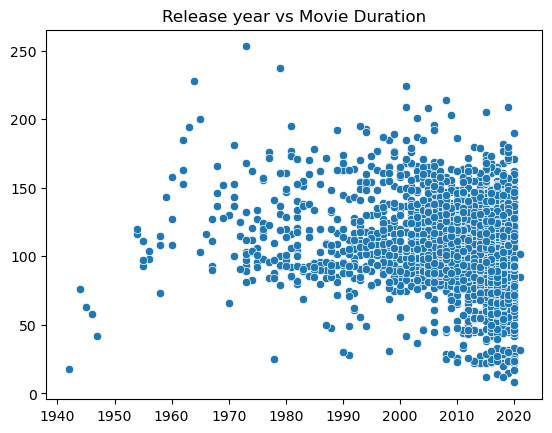

In [31]:
sns.scatterplot(data = movies, x = "release_year", y = "duration")
plt.title("Release year vs Movie Duration")
plt.xlabel("")
plt.ylabel("")
plt.savefig("Release year vs Movie Duration");

*There is no relationship between release year and duration except that more movies were released from 1980.

__Q6: What is the trend in TV shows released over the years?__

In [34]:
#subsetting only TV Show
TV_Show = Netflix[Netflix["type"] == "TV Show"].copy()
# Number of rows vs columns
TV_Show.shape

(135, 11)

In [35]:
#frequency of TV Show release each year
tv_show_trend = TV_Show["release_year"].value_counts().sort_index()
tv_show_trend

release_year
1990     1
2001     1
2006     3
2010     1
2011     2
2012     4
2013     3
2014     7
2015     9
2016    10
2017    18
2018    17
2019    24
2020    34
2021     1
Name: count, dtype: int64

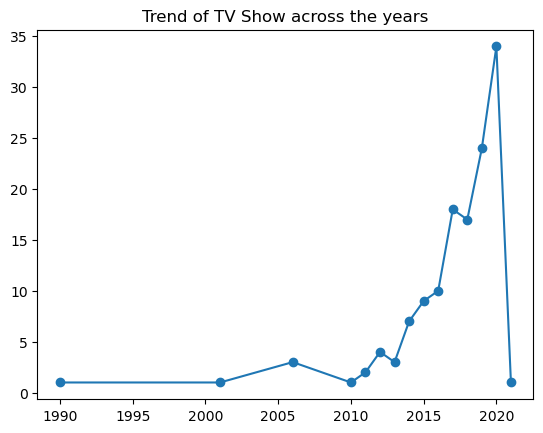

In [36]:
tv_show_trend.plot(kind = "line", marker = "o")
plt.title("Trend of TV Show across the years")
plt.xlabel("")
plt.savefig("Trend of TV Show across the years")
plt.show()

__Q7: What are the top 10 countries producing movies?__

In [38]:
top_movies = movies["country"].value_counts().nlargest(10).sort_values(ascending = True)
top_movies

country
Hong Kong           73
Philippines         74
Turkey              76
Egypt               91
Spain              105
France             129
Canada             151
United Kingdom     289
India              858
United States     1856
Name: count, dtype: int64

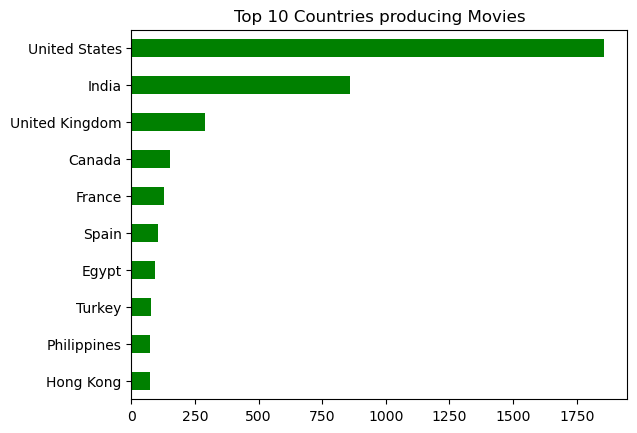

In [39]:
top_movies.plot(kind = "barh", color = "green")
plt.title("Top 10 Countries producing Movies")
plt.ylabel("")
plt.savefig("Top 10 Countries producing Movies")
plt.show()

__Q8: What are the top 10 Genres in the industry__

In [41]:
top_genres = Netflix["genre"].value_counts().nlargest(10).sort_values(ascending = True)
top_genres

genre
Thrillers                 49
Classic Movies            69
International Movies     100
Horror Movies            239
Stand-Up                 283
Documentaries            352
Children                 421
Action                   696
Comedies                1029
Dramas                  1343
Name: count, dtype: int64

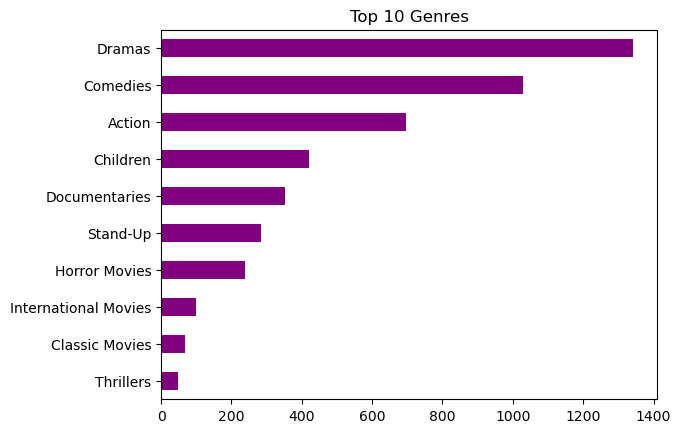

In [42]:
top_genres.plot(kind = "barh", color = "purple")
plt.title("Top 10 Genres")
plt.ylabel("")
plt.savefig("Top 10 Genres")
plt.show()

__Q9: What are the top 10 years?__

In [44]:
top_years = Netflix["release_year"].value_counts().nlargest(10).sort_values(ascending = True)
top_years

release_year
2010    125
2012    150
2013    183
2014    224
2015    340
2020    379
2019    488
2016    562
2018    624
2017    646
Name: count, dtype: int64

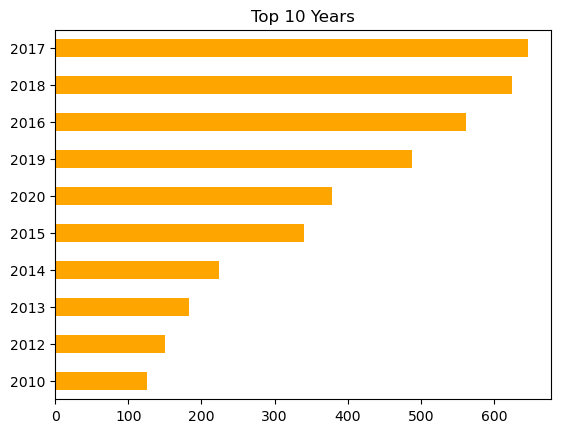

In [45]:
top_years.plot(kind = "barh", color = "orange")
plt.title("Top 10 Years")
plt.ylabel("")
plt.savefig("Top 10 Years")
plt.show()

__Q10: Frequent Cast Members in 1990s Movies__

In [47]:
freq_cast = movies_1990s["cast"].str.split(",").explode().value_counts().nlargest(5)
freq_cast

cast
Shah Rukh Khan     9
 Anupam Kher       9
 Mohnish Bahl      7
 Karisma Kapoor    6
 Alok Nath         6
Name: count, dtype: int64

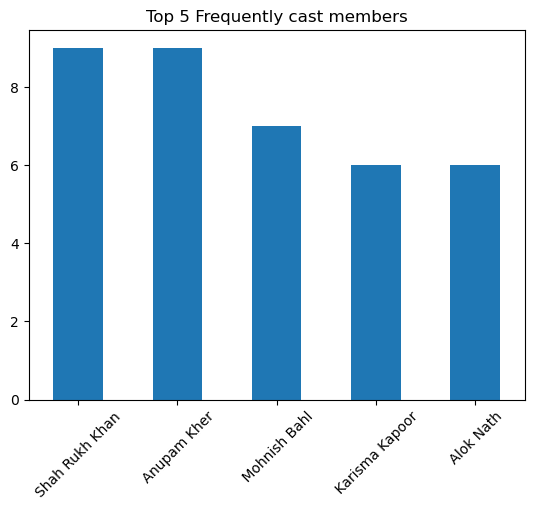

In [48]:
freq_cast.plot(kind = "bar")
plt.xticks(rotation = 45)
plt.title("Top 5 Frequently cast members")
plt.xlabel("")
plt.savefig("Top 5 Frequently cast members")
plt.show()

__Q11: How do the average Duration of action and comedy genres change over the years__

In [50]:
action_comedy = Netflix[Netflix["genre"].isin(["Action", "Comedies"])]
action_comedy.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
14,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,2019,124,"On India's Independence Day, a zany mishap in ...",Comedies
16,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,2018-09-15,2018,128,"A taxi driver, a gangster and an athlete strug...",Action
23,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,99,When nerdy high schooler Dani finally attracts...,Comedies
24,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,2018,105,A teenage hacker with a huge nose helps a cool...,Comedies


In [51]:
avg_duration = action_comedy.groupby(["release_year", "genre"])["duration"].median().reset_index()
avg_duration

,release_year,genre,duration
0,1956,Action,98.0
1,1960,Action,127.0
2,1960,Comedies,158.0
3,1962,Action,185.0
4,1962,Comedies,163.0
...,...,...,...
95,2019,Action,103.0
96,2019,Comedies,99.5
97,2020,Action,102.5
98,2020,Comedies,102.0


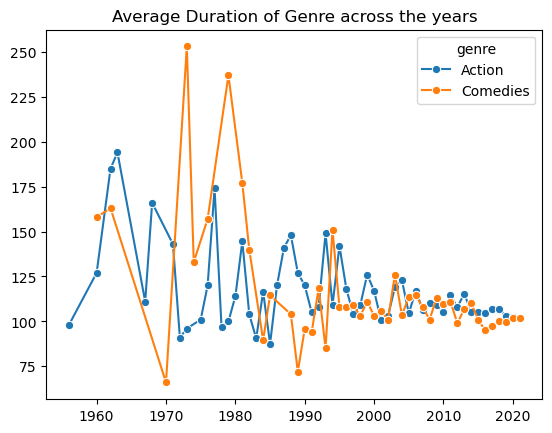

In [52]:
sns.lineplot(data = avg_duration, x = "release_year", y = "duration", marker = "o", hue = "genre")
plt.title("Average Duration of Genre across the years")
plt.xlabel("")
plt.ylabel("")
plt.savefig("Average Duration of Genre across the years")
plt.show()

In [53]:
summary_text = f"""
Netflix Dataset EDA Summary

- Total titles: {Netflix.shape[0]}
- Movies: {movie.get('Movie', 0)}
- TV Shows: {TV_Show.get('TV Show', 0)}
- Most common genre: {top_genres.index[0]}
- Year with most releases: {top_years.idxmax()}
"""

with open("netflix_eda_summary.txt", "w") as f:
    f.write(summary_text)

print("EDA summary exported successfully.")

EDA summary exported successfully.
